# Final Term Project | APP DEV (Group)

Depression Anxiety Stress Scales Responses
---- https://www.kaggle.com/datasets/lucasgreenwell/depression-anxiety-stress-scales-responses

Individual project objective:
1. Perform the exploratory data analysis on the approved dataset.
2. Provide information about the dataset e.g brief description, meta data, project objective, etc.
3. Exctract insights.
4. Visualize the data and interpret.
5. Perform feature engineering and feature scaling.
6. Export the cleaned dataset as a csv. 

# Depression Anxiety Stress Scales Responses

Questions, answers, and metadata collected from 39775 respondents for Depression Anxiety Stress Scales. The data was hosted on OpenPsychometrics.org a nonprofit effort to educate the public about psychology and to collect data for psychological research.

<p><b>Metadata column example:</b></p>
<hr>
<p><b>42 Questions </b></p>
<p>Question 1: I found myself getting upset by quite trivial things.</p>
<p>Question 2: I was aware of dryness of my mouth.</p>
<p>Question 3: I couldn't seem to experience any positive feeling at all.</p>
<p>Question 4: I experienced breathing difficulty.</p>
<p>Question 5: I just couldn't seem to get going.</p>
<p>Question N: ...</p>
<p> --- --- </p>
<p>1 = Did not apply to me at all </p>
<p>2 = Applied to me to some degree, or some of the time </p>
<p>3 = Applied to me to a considerable degree, or a good part of the time </p>
<p>4 = Applied to me very much, or most of the time </p>
<hr>
<hr>
<p><b>The Ten Item Personality Inventory </b></p>
<p>TIPI1	Extraverted, enthusiastic.</p>
<p>TIPI2	Critical, quarrelsome.</p>
<p>TIPI3	Dependable, self-disciplined.</p>
<p>TIPI4	Anxious, easily upset.</p>
<p>TIPI5	Open to new experiences, complex.</p>
<p>TIPI6	Reserved, quiet.</p>
<p>TIPI7	Sympathetic, warm.</p>
<p>TIPI8	Disorganized, careless.</p>
<p>TIPI9	Calm, emotionally stable.</p>
<p>TIPI10	Conventional, uncreative.</p>
<p> --- --- </p>
<p>1 = Disagree strongly </p>
<p>2 = Disagree moderately </p>
<p>3 = Disagree a little </p>
<p>4 = Neither agree nor disagree </p>
<p>5 = Agree a little </p>
<p>6 = Agree moderately </p>
<p>7 = Agree strongly </p>
<hr>
<hr>

<p><b>Major variables </b></p>
<p><b>1. Education</b></p>
<p>1 = Less than high school </p>
<p>2 = High school </p>
<p>3 = University degree </p>
<p>4 = Graduate degree </p>

<p><b>2. urban</b></p>
<p>1 = Rural (country side)l </p>
<p>2 = Suburban </p>
<p>3 = Graduate degree </p>

<p><b>3. Gender</b></p>
<p>1 = Male </p>
<p>2 = Female </p>
<p>3 = Other </p>

<p><b>4. Religion</b></p>
<p>1 = Agnostic </p>
<p>2 = Atheist </p>
<p>3 = Buddhist </p>
<p>4 = Christian (Catholic) </p>
<p>5 = Christian (Mormon) </p>
<p>6 = Christian (Protestant) </p>
<p>7 = Christian (Other) </p>
<p>8 = Hindu </p>
<p>9 = Jewish </p>
<p>10 = Muslim </p>
<p>11 = Sikh </p>
<p>12 = Other</p>

<p><b>5. Orientation</b></p>
<p>1 = Heterosexual </p>
<p>2 = Bisexual </p>
<p>3 = Homosexual </p>
<p>4 = Asexual </p>
<p>5 = Other </p>

<p><b>6. Race</b></p>
<p>10 = Asian </p>
<p>20 = Arab </p>
<p>30 = Black </p>
<p>40 = Indigenous Australian </p>
<p>50 = Native American </p>
<p>60 = White </p>
<p>70 = Other </p>

<p><b>7. Married</b></p>
<p>1 = Never married</p>
<p>2 = Currently married </p>
<p>3 = Previously married </p>
<hr>
<hr>

Dataset uploader: Aleksei Golovin

Project objective:
1. Get insights / explore data
2. Supervised learning --> Classification (Predicts the level of depression of a person)

<b>Import libraries / Setting up</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remove warnings
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler

<b>Self-made Functions</b>

In [2]:
def computeIQR(target):
    Q25 = np.percentile(target, 25)
    Q75 = np.percentile(target, 75)
    IQR = Q75 - Q25
    lowerlimit = max(0, Q25 - 1.5 * IQR)
    upperlimit = Q75 + 1.5 * IQR
    return lowerlimit, upperlimit

def computeSTD(target):
    mean = np.mean(target)
    std = np.std(target)
    lowerlimit = max(0, mean - 3 * std)
    upperlimit = mean + 3 * std
    return lowerlimit, upperlimit

<b>The Dataset</b>

In [3]:
# settings for pandas dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# reading the data
dataframe = pd.read_csv('data.csv', delimiter = '\t')

In [4]:
# sample rows
dataframe.sample(5)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
8417,1,24,2351,1,37,1695,1,21,3125,1,5,3155,1,36,1550,1,31,2518,1,30,3102,1,9,1611,1,26,2820,1,27,3230,1,40,1487,1,19,3794,1,3,3742,2,18,3877,1,42,1233,1,25,2324,1,22,1542,1,20,4070,1,29,8697,1,6,1811,1,13,1631,1,23,1467,1,15,1186,1,16,3070,1,39,2091,1,4,4844,1,2,6465,1,28,1288,1,35,2319,1,41,2148,1,8,2570,1,34,2032,1,32,1260,1,33,1141,1,17,4709,1,14,3181,1,12,1447,1,1,12218,1,11,1338,1,7,1967,1,38,1659,1,10,4772,MY,1,3,123,153,6,3,6,1,7,4,3,2,7,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,3,3,2,2,20,1,1,1,10,1,10,2,1,3,Mechanical engineering
5726,4,27,4275,4,15,3500,4,4,4202,4,22,3431,3,7,14215,4,32,3218,4,16,4449,3,5,6776,3,31,7300,4,26,3397,4,17,2717,3,39,5359,4,10,2686,4,30,4074,4,23,2295,4,42,4680,4,38,5646,2,2,12198,3,6,18117,4,29,2299,4,37,2079,4,13,3851,4,40,4249,4,28,3702,4,14,6767,4,9,4904,4,20,3712,4,11,2855,4,33,4081,4,41,5428,4,12,4987,4,25,4119,2,1,20147,4,19,4085,4,36,7737,3,3,3381,4,21,3022,4,35,2213,4,34,2547,4,18,6299,3,8,6384,4,24,5124,MX,0,6,228,245,2,1,2,7,1,5,2,7,2,7,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,2,1,2,2,20,1,1,1,1,2,70,2,1,2,Forensic medicine
21487,2,40,2965,1,14,2693,2,35,3695,2,15,5355,2,22,6893,4,42,2906,4,24,1984,2,32,2250,3,28,2641,4,4,4327,3,11,4437,4,5,3009,3,37,1777,3,29,4384,1,30,2455,2,19,3160,4,8,2287,3,7,2175,3,38,5098,2,39,5426,2,9,2785,3,26,1251,2,13,2570,3,6,3858,3,3,9877,2,10,2356,3,25,2317,2,33,1729,3,12,2631,3,41,3106,3,36,2648,2,31,3179,3,27,2144,2,21,1786,3,1,9868,4,17,2136,2,16,4433,2,2,8936,2,20,1635,3,18,5468,3,23,2201,2,34,2240,MY,0,3,150,138,5,6,6,7,5,4,5,6,3,5,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,2,1,1,2,24,1,2,1,10,1,10,2,1,2,History
6895,2,27,3481,1,4,4835,1,20,2951,1,16,9535,1,40,5766,2,7,6058,1,38,2996,2,41,3081,2,12,6041,1,15,2899,2,39,2612,1,19,7946,1,14,1850,2,32,4662,1,26,3708,2,21,8388,3,36,3364,3,8,3749,2,5,6779,2,31,5110,3,6,2678,2,2,11050,1,9,2912,1,22,3189,1,37,6822,2,18,2658,2,28,3186,1,42,2309,1,25,4041,1,34,4983,1,30,3054,2,23,5294,1,11,2225,2,17,2086,2,24,4778,1,33,1377,2,35,4466,2,1,9930,3,3,30954,2,13,6010,2,10,6964,2,29,4569,MY,0,3,223,168,5,6,6,4,7,4,7,5,7,7,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,3,2,2,2,19,1,1,1,10,1,10,2,1,4,Land Administration
12579,3,5,2719,1,18,1448,1,25,2901,2,2,6818,2,38,2884,3,40,2177,2,19,2836,4,34,1419,1,21,3919,1,23,1699,3,29,2544,3,7,3670,4,11,1799,2,4,4346,1,15,2285,1,41,5322,2,27,3684,2,26,2548,3,35,2951,2,13,2198,1,24,2283,3,33,4151,1,30,1668,1,20,2034,2,6,2632,4,12,2133,2,39,1686,3,8,3097,3,31,2795,1,36,3467,1,17,1796,1,16,2749,3,3,4382,1,32,1867,2,1,3405,2,14,1746,1,22,4208,1,42,1715,2,28,2156,3,10,8100,4,9,2552,2,37,4078,US,1,8,151,125,5,2,5,7,5,5,5,4,5,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2,0,2,1,18,1,1,1,0,0,60,2,1,0,NaN


In [5]:
# quick summary 
dataframe.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.00000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,3.977500e+04,3.977500e+04,3.977500e+04,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,21.499837,7.128728e+03,2.521458,21.492118,5.919306e+03,2.540214,21.562866,5.724097e+03,1.924928,21.528422,9.776971e+03,2.480427,21.569227,4.444627e+03,2.669591,21.582778,1.833083e+04,2.447316,21.417574,9.157494e+03,2.803294,21.434041,5.490152e+03,2.425669,21.485808,6.570469e+03,2.784538,21.501446,3.931872e+03,2.580264,21.571791,1.034875e+04,1.826901,21.501672,5.243594e+03,2.519573,21.459485,6.446743e+03,2.658605,21.497021,5.197918e+03,2.477536,21.530685,7.293520e+03,1.946298,21.549994,1.124446e+04,2.323042,21.519899,4.965477e+03,2.349591,21.566989,5.596290e+03,2.344488,21.516229,6.865094e+03,1.562288,21.479246,4.603325e+03,2.437109,21.531263,8.142970e+03,2.184312,21.563193,1.408290e+04,2.658580,21.445179,5.336940e+03,2.612344,21.527366,8.448039e+03

<b>Feature Category</b>

In [6]:
dataframe.shape

(39775, 172)

Consists of <b>39775</b> rows and <b>172</b> columns

In [7]:
dataframe.columns

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)

<h3 style="color: green;">To be used ✅</h3>
<i>These variables are essential for extracting insights and for the prediction model</i>

<ul>
    <li>Q[n]A to Q[n]A</li>
    <li>TIPI1 to TIPI10</li>
    <li>education</li>
    <li>country</li>
    <li>urban</li>
    <li>age</li>
    <li>religion</li>
    <li>race</li>
    <li>married</li>
    <li>familysize</li>
    <li>orientation</li>
    <li>gender</li>
</ul>

<h3 style="color: red;">To be removed ❌</h3>
<i>These variables are extra information only and does not have anything to do with the prediction model</i>

<ul>
    <li>Q[n]E</li>
    <li>Q[n]I</li>
    <li>introelapse</li>
    <li>testelapse</li>
    <li>surveyelapse</li>
    <li>engnat</li>
    <li>hand</li>
    <li>voted</li>
    <li>screensize</li>
    <li>uniquenetworklocation</li>
    <li>VCL[n]</li>
    <li>source</li>
    <li>major</li>
</ul>

In [8]:
# unnecesary features to be removed
dataframe.drop(['introelapse', 'testelapse', 'surveyelapse', 'engnat', 'hand', 'voted', 'screensize', 'uniquenetworklocation', 'source', 'major'], axis=1, inplace=True)

# 'Q1E' to 'Q42E' to be removed
for i in range(1, 43):
    target = "Q" + str(i) + "E"
    dataframe.drop([target], axis=1, inplace=True)
    
# 'Q1I' to 'Q42I' to be removed
for i in range(1, 43):
    target = "Q" + str(i) + "I"
    dataframe.drop([target], axis=1, inplace=True)

# 'VCL1' to 'VCL16' to be removed 
for i in range(1, 17):
    target = "VCL" + str(i)
    dataframe.drop([target], axis=1, inplace=True)

dataframe.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,country,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,orientation,race,married,familysize
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,IN,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,1,10,1,2
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,US,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,0,70,1,4
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,PL,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,3,60,1,3
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,US,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,5,70,1,5
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,MY,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,1,10,1,4


In [9]:
dataframe.shape

(39775, 62)

Consists of <b>39775</b> rows and <b>62</b> columns

<b>Handle Null Values</b>

<AxesSubplot:>

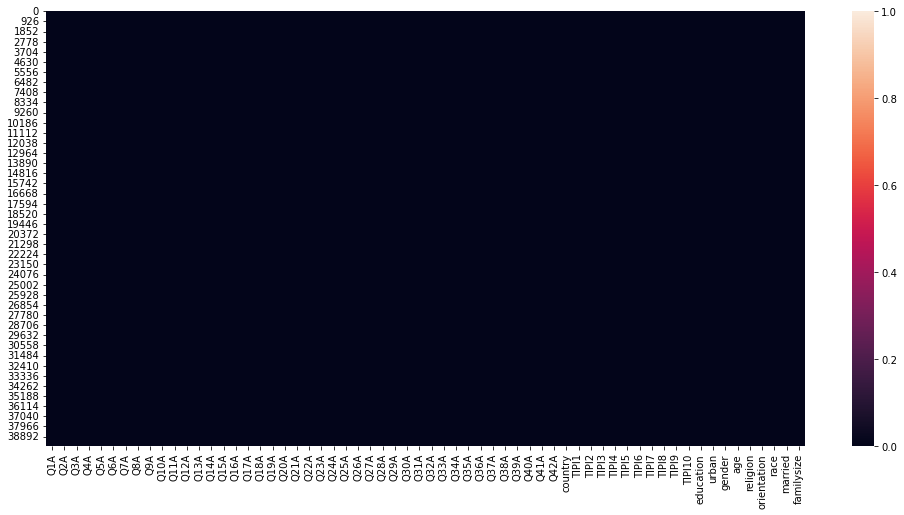

In [10]:
plt.figure(figsize=(17, 8))
sns.heatmap(dataframe.isnull())

In [11]:
# get the number of missing data points per column
null_column_count = (dataframe.isnull().sum())
null_column_count[null_column_count > 0]

country    2
dtype: int64

1. Handling country column

In [12]:
dataframe['country'].mode()[0]

'MY'

In [13]:
dataframe['country'].value_counts()

MY      21605
US       8207
GB       1180
CA        978
ID        884
PH        749
AU        608
NONE      539
IN        446
DE        314
SG        292
NZ        216
FR        187
BR        180
PL        172
BN        171
MX        154
RO        143
IT        138
NL        114
ES         90
JP         85
FI         81
TR         80
ZA         79
PK         79
SE         76
EG         75
GR         74
IE         74
RS         67
PT         61
RU         61
CZ         58
HK         57
SA         56
AR         55
HR         54
DK         52
AE         52
JM         50
NO         49
HU         47
CH         46
AT         45
VN         39
BG         38
BE         35
KR         31
CL         30
TH         29
CO         27
IL         25
SK         24
LT         24
UA         24
MA         23
BA         22
NG         21
EE         20
BD         19
VE         18
PE         18
JO         18
SI         17
TW         16
AL         16
LK         15
MK         15
IS         14
KW         14
LB    

In [14]:
dataframe['country'].fillna(dataframe['country'].mode()[0], axis = 0, inplace = True)

In [15]:
# get the number of missing data points per column
null_column_count = (dataframe.isnull().sum())
null_column_count[null_column_count > 0]

Series([], dtype: int64)

<AxesSubplot:>

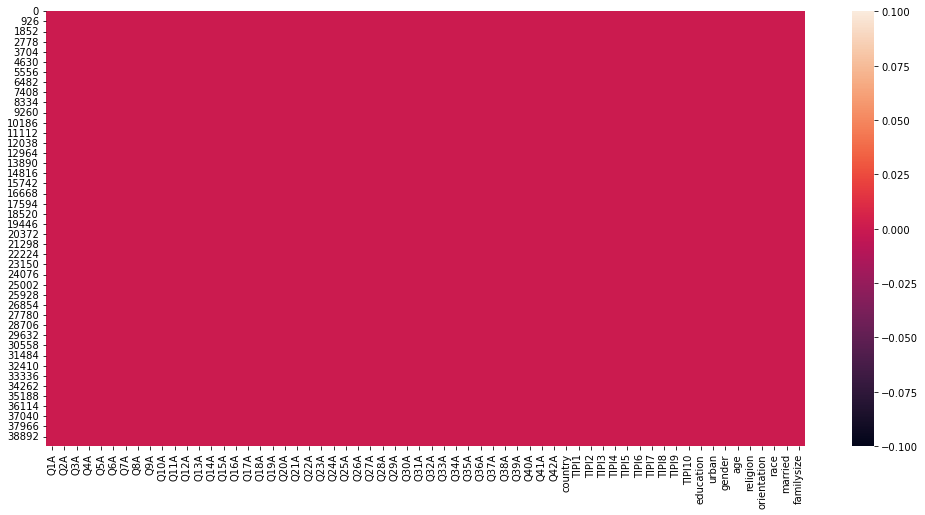

In [16]:
plt.figure(figsize=(17, 8))
sns.heatmap(dataframe.isnull())

<B>Handling Outliers</b>

<b>1. Age</b>

<AxesSubplot:xlabel='age', ylabel='Density'>

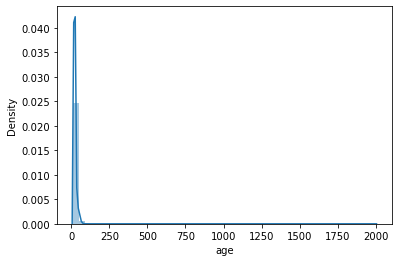

In [17]:
sns.distplot(dataframe['age'])

<AxesSubplot:xlabel='age'>

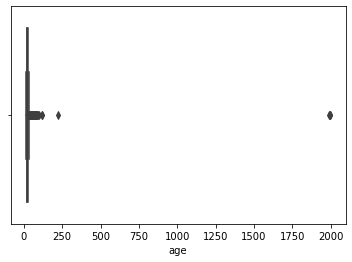

In [18]:
sns.boxplot(dataframe['age'])

In [19]:
print("Using IQR method")
print(computeIQR(dataframe['age']))
print("-----")
print("Using STD")
print(computeSTD(dataframe['age']))

Using IQR method
(7.5, 35.5)
-----
Using STD
(0, 88.35652144924609)


In [20]:
dataframe['age'].value_counts()

20      3789
21      3535
19      3510
18      3046
22      3009
23      2523
17      2309
16      2123
24      1918
25      1709
15      1415
26      1220
27      1026
14       933
28       852
29       641
30       623
13       489
31       443
32       424
33       396
34       311
35       293
36       238
38       231
37       200
40       197
39       178
42       170
45       146
47       139
41       124
55       120
44       118
50       118
46       118
43       116
48       107
49        88
52        85
53        83
54        72
51        69
57        68
56        59
58        56
60        42
61        40
59        35
62        29
63        26
65        23
64        23
66        16
67        14
68        12
72        10
70         9
71         8
69         8
75         8
73         6
77         4
79         4
80         4
76         3
74         2
1993       1
115        1
1991       1
1998       1
85         1
82         1
117        1
89         1
1996       1
223        1

In [21]:
lowerlimit, upperlimit = computeSTD(dataframe['age'])
print("Lower age = ", lowerlimit)
print("Upper age = ", upperlimit)

dataframe.loc[(dataframe['age'] < lowerlimit) | (dataframe['age'] > upperlimit),"age"] = dataframe['age'].median()

Lower age =  0
Upper age =  88.35652144924609


<AxesSubplot:xlabel='age', ylabel='Density'>

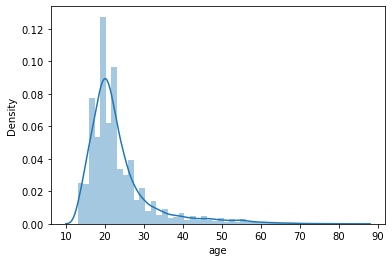

In [22]:
sns.distplot(dataframe['age'])

<AxesSubplot:xlabel='age'>

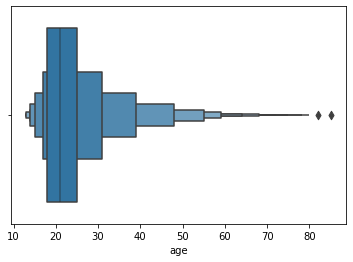

In [23]:
# sns.boxplot(dataframe['age'])
sns.boxenplot(x=dataframe['age']) 

In [24]:
# lowerlimit, upperlimit = computeSTD(dataframe['age'])
# print("Lower age = ", lowerlimit)
# print("Upper age = ", upperlimit)

# dataframe.loc[(dataframe['age'] < lowerlimit) | (dataframe['age'] > upperlimit),"age"]= dataframe['age'].median()

In [25]:
# sns.distplot(dataframe['age'])

In [26]:
# sns.boxplot(dataframe['age'])

<b>2. Family Size</b>

<AxesSubplot:xlabel='familysize', ylabel='Density'>

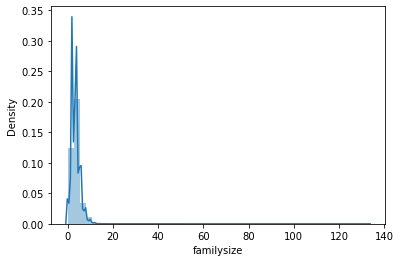

In [27]:
sns.distplot(dataframe['familysize'])

<AxesSubplot:xlabel='familysize'>

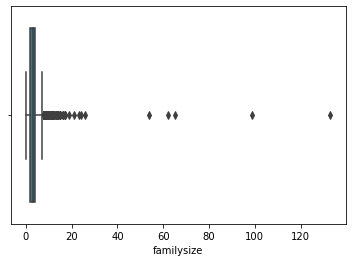

In [28]:
sns.boxplot(dataframe['familysize'])

In [29]:
print("Using IQR method")
print(computeIQR(dataframe['familysize']))
print("-----")
print("Using STD")
print(computeSTD(dataframe['familysize']))

Using IQR method
(0, 7.0)
-----
Using STD
(0, 9.934744200169776)


In [30]:
lowerlimit, upperlimit = computeIQR(dataframe['familysize'])
print("Lower familysize = ", lowerlimit)
print("Upper familysize = ", upperlimit)

dataframe.loc[(dataframe['familysize'] < lowerlimit) | (dataframe['familysize'] > upperlimit),"familysize"]= dataframe['familysize'].median()

Lower familysize =  0
Upper familysize =  7.0


<AxesSubplot:xlabel='familysize', ylabel='Density'>

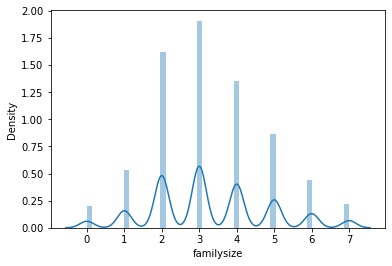

In [31]:
sns.distplot(dataframe['familysize'])

<AxesSubplot:xlabel='familysize'>

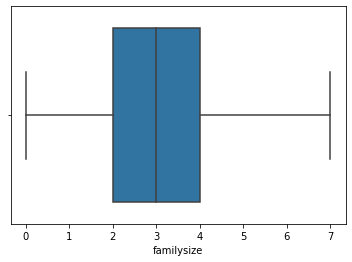

In [32]:
sns.boxplot(dataframe['familysize'])

<b>3. Married</b>

In [33]:
dataframe['married'].value_counts()

1    34131
2     4357
3     1092
0      195
Name: married, dtype: int64

In [34]:
dataframe.loc[dataframe['married'] == 0,"married"]= dataframe['married'].median()

In [35]:
dataframe['married'].value_counts()

1    34326
2     4357
3     1092
Name: married, dtype: int64

<b>4. Urban</b>

In [36]:
dataframe['urban'].value_counts()

3    17843
2    13232
1     8318
0      382
Name: urban, dtype: int64

In [37]:
dataframe.loc[dataframe['urban'] == 0,"urban"]= dataframe['urban'].median()

In [38]:
dataframe['urban'].value_counts()

3    17843
2    13614
1     8318
Name: urban, dtype: int64

<b>5. Gender</b>

In [39]:
dataframe['gender'].value_counts()

2    30367
1     8789
3      552
0       67
Name: gender, dtype: int64

In [40]:
dataframe.loc[dataframe['gender'] == 0,"gender"] = dataframe['gender'].median()

In [41]:
dataframe['gender'].value_counts()

2    30434
1     8789
3      552
Name: gender, dtype: int64

<b>6. Orientation</b>

In [42]:
dataframe['orientation'].value_counts()

1    24269
2     5006
5     3460
0     3109
4     1976
3     1955
Name: orientation, dtype: int64

In [43]:
dataframe.loc[dataframe['orientation'] == 0,"orientation"] = dataframe['orientation'].median()

In [44]:
dataframe['orientation'].value_counts()

1    27378
2     5006
5     3460
4     1976
3     1955
Name: orientation, dtype: int64

<b>7. Religion</b>

In [45]:
dataframe['religion'].value_counts()

10    22073
2      3845
1      3245
4      3097
7      2254
12     1804
6      1544
8       700
3       527
0       356
9       144
5       122
11       64
Name: religion, dtype: int64

In [46]:
dataframe.loc[dataframe['religion'] == 0,"religion"] = dataframe['religion'].median()

In [47]:
dataframe['religion'].value_counts()

10    22429
2      3845
1      3245
4      3097
7      2254
12     1804
6      1544
8       700
3       527
9       144
5       122
11       64
Name: religion, dtype: int64

<b>Feature Scaling</b>

In [48]:
minmax=MinMaxScaler()

dataframe['minmax_scaled_age']= minmax.fit_transform(dataframe[['age']])

In [49]:
dataframe['minmax_scaled_familysize']= minmax.fit_transform(dataframe[['familysize']])

In [50]:
dataframe.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,country,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,orientation,race,married,familysize,minmax_scaled_age,minmax_scaled_familysize
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,IN,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,1,10,1,2,0.041667,0.285714
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,US,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,1,70,1,4,0.041667,0.571429
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,PL,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,3,60,1,3,0.055556,0.428571
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,US,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,5,70,1,5,0.000000,0.714286
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,MY,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,1,10,1,4,0.083333,0.571429


# Extracting Insights

1. Extracting insights for education feature

<AxesSubplot:xlabel='education', ylabel='count'>

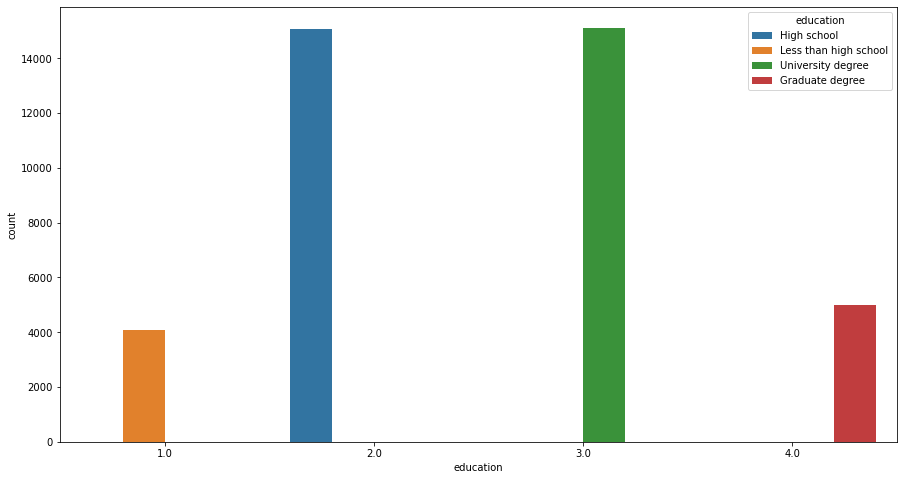

In [51]:
# mapping
dataframe['education'] = dataframe['education'].map({1: 1, 2: 2, 3: 3, 4: 4 })

# information
def changeEducationTitle(title) -> str:
    if title == 0 or title == 1:
        return 'Less than high school'
    if title == 2:
        return 'High school'
    if title == 3: 
        return 'University degree'
    if title == 4: 
        return 'Graduate degree'
    return title

# applying corresponding information to its initial numeric data
education_string = dataframe['education'].apply(changeEducationTitle)

# plotting
plt.figure(figsize=(15, 8))
sns.countplot(x=dataframe['education'], hue=education_string)

<p style="text-align:center;">The most people who participated in the survey are high school and university students.</p>

<AxesSubplot:xlabel='urban', ylabel='count'>

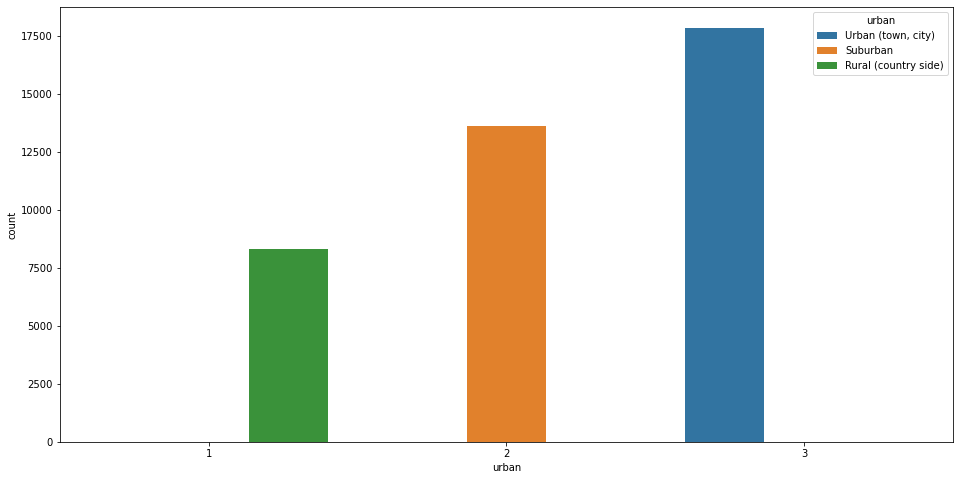

In [52]:
# mapping
dataframe['urban'] = dataframe['urban'].map({1: 1, 2: 2, 3: 3})

# information
def changeUrbanValues(value):
    if value == 1:
        return 'Rural (country side)'
    if value == 2:
        return 'Suburban'
    if value == 3:
        return 'Urban (town, city)'
    return value 

# applying corresponding information to its initial numeric data
urban = dataframe['urban'].apply(changeUrbanValues)

# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x=dataframe['urban'], hue= urban)

<p style="text-align:center;">The most people who participated in the survey are living in an urban area.</p>

<AxesSubplot:xlabel='race', ylabel='count'>

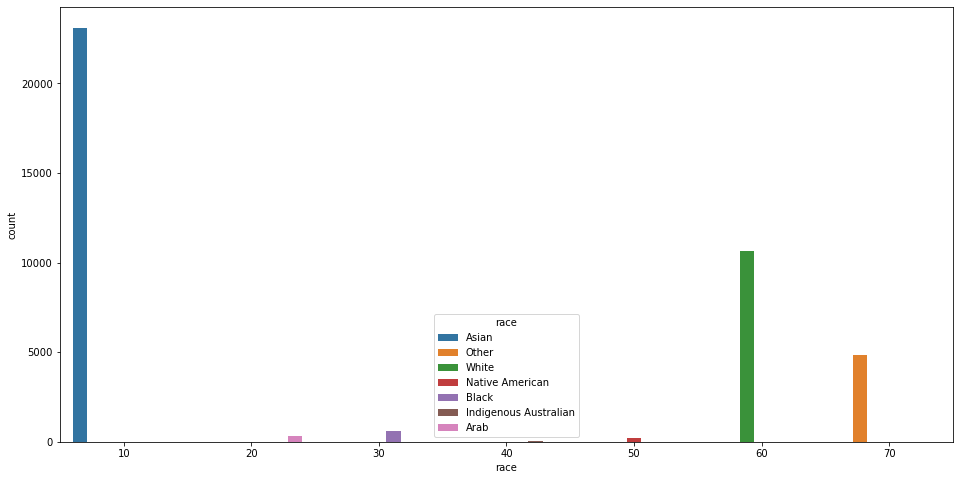

In [53]:
# mapping
dataframe['race'] = dataframe['race'].map({10: 10, 20: 20, 30: 30, 40: 40, 50: 50, 60: 60, 70: 70})

# information
def changeUrbanValues(value):
    if value == 10:
        return 'Asian'
    if value == 20:
        return 'Arab'
    if value == 30:
        return 'Black'
    if value == 40:
        return 'Indigenous Australian'
    if value == 50:  
        return 'Native American'
    if value == 60:  
        return 'White'
    if value == 70:  
        return 'Other'
    return value 

# applying corresponding information to its initial numeric data
race = dataframe['race'].apply(changeUrbanValues)

# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x=dataframe['race'], hue= race)

Text(0.5, 1.0, 'Top 20 Countries from where people participated in the Survey')

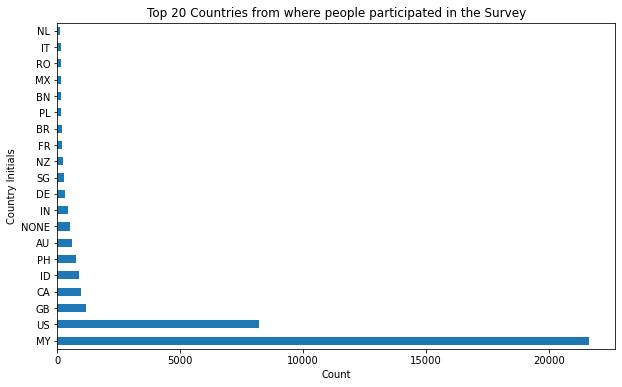

In [54]:
# plotting
plt.figure(figsize=(10,6))
dataframe['country'].value_counts()[:20].plot(kind='barh')
plt.ylabel('Country Initials')
plt.xlabel('Count')
plt.title('Top 20 Countries from where people participated in the Survey')

<p style="text-align:center;">The most race who participated in the survey are Asians.</p>

<AxesSubplot:xlabel='married', ylabel='count'>

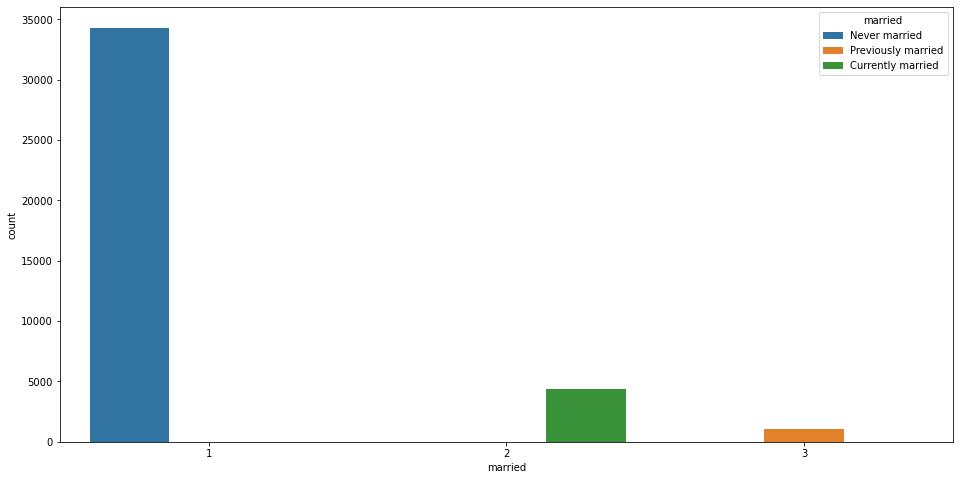

In [55]:
# mapping
dataframe['married'] = dataframe['married'].map({1: 1, 2: 2, 3: 3})

# information
def changeUrbanValues(value):
    if value == 1:
        return 'Never married'
    if value == 2:
        return 'Currently married'
    if value == 3:
        return 'Previously married'
    return value 

# applying corresponding information to its initial numeric data
married = dataframe['married'].apply(changeUrbanValues)

# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x=dataframe['married'], hue= married)

<p style="text-align:center;">The most people who participated in the survey are never married.</p>

<AxesSubplot:xlabel='orientation', ylabel='count'>

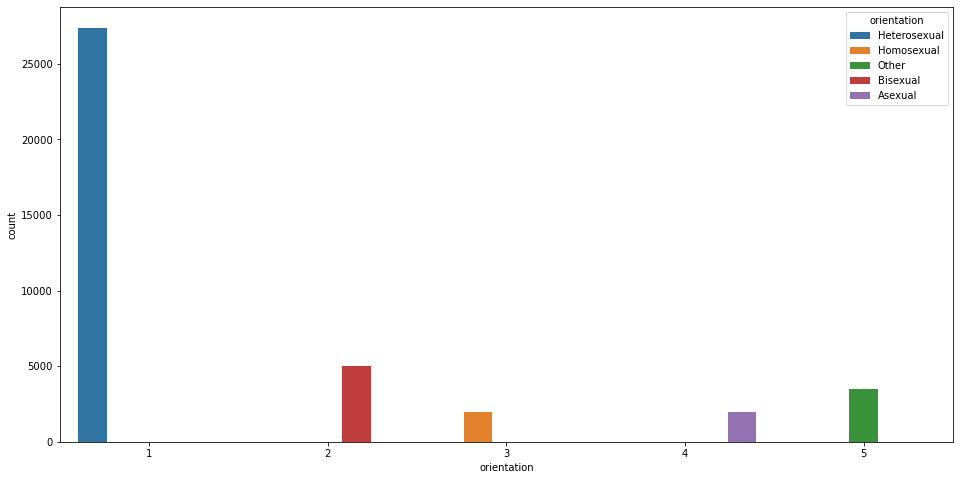

In [56]:
# mapping
dataframe['orientation'] = dataframe['orientation'].map({1: 1, 2: 2, 3: 3, 4: 4, 5: 5})

# information
def changeUrbanValues(value):
    if value == 1:
        return 'Heterosexual'
    if value == 2:
        return 'Bisexual'
    if value == 3:
        return 'Homosexual'
    if value == 4:
        return 'Asexual'
    if value == 5:
        return 'Other'
    return value 

# applying corresponding information to its initial numeric data
orientation = dataframe['orientation'].apply(changeUrbanValues)

# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x = dataframe['orientation'], hue = orientation)

<p style="text-align:center;">The most people who participated in the survey are heterosexual.</p>

<AxesSubplot:xlabel='religion', ylabel='count'>

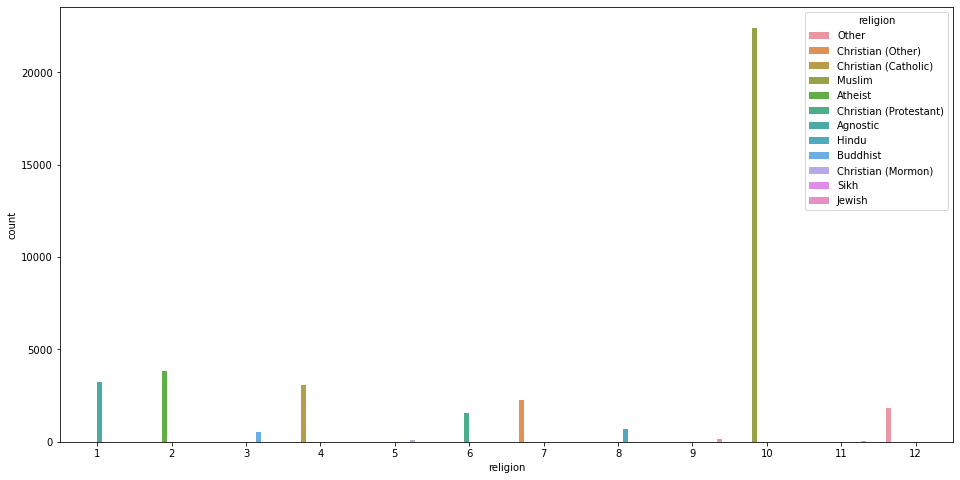

In [57]:
# mapping
dataframe['religion'] = dataframe['religion'].map({1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12})

# information
def changeUrbanValues(value):
    if value == 1:
        return 'Agnostic'
    if value == 2:
        return 'Atheist'
    if value == 3:
        return 'Buddhist'
    if value == 4:
        return 'Christian (Catholic)'
    if value == 5:
        return 'Christian (Mormon)'
    if value == 6:
        return 'Christian (Protestant)'
    if value == 7:
        return 'Christian (Other)'
    if value == 8:
        return 'Hindu'
    if value == 9:
        return 'Jewish'
    if value == 10:
        return 'Muslim'
    if value == 11:
        return 'Sikh'
    if value == 12:
        return 'Other'
    return value 

# applying corresponding information to its initial numeric data
religion = dataframe['religion'].apply(changeUrbanValues)

# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x = dataframe['religion'], hue = religion)

<p style="text-align:center;">The most religion who participated in the survey are muslims.</p>

<AxesSubplot:xlabel='age', ylabel='count'>

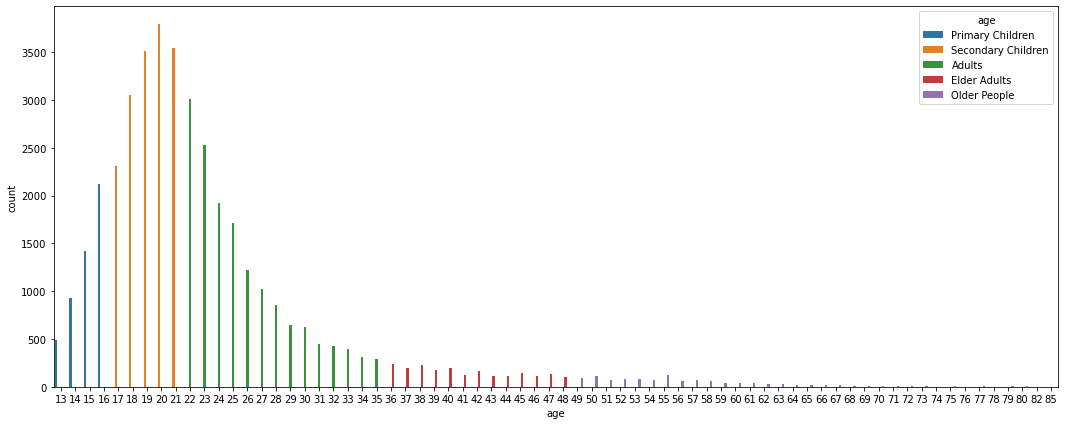

In [58]:
# information
def makeAgeGroup(value):
    if value <= 10:
        return 'Under 10'
    if  10 <= value <= 16:
        return 'Primary Children'
    if 17 <= value <= 21:
        return 'Secondary Children'
    if 21 <= value <= 35:
        return 'Adults' 
    if 36 <= value <= 48:
        return 'Elder Adults'
    if value >= 49:
        return 'Older People'

# applying corresponding information to its initial numeric data
age = dataframe['age'].apply(makeAgeGroup)

# plotting
plt.figure(figsize=(18, 7))
sns.countplot(x=dataframe['age'], hue = age)

<p style="text-align:center;">The most group of age who participated in the survey are secondary children.</p>

In [59]:
dataframe.to_csv('cleaned_data.csv', index=False)